# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))


Score: 0.0


When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

### 5. Import Double Q-learning Agent

See also "Deep Reinforcement Learning with Double Q-learning" by  Google Deep Mind Team: Hado van HasseltandArthur GuezandDavid Silver.
https://arxiv.org/abs/1509.06461v3

We are using a ϵ-greedy policy with decreasing rate of exploration.


#### 1. Initialize the reply memory D with capacity N (BUFFER_SIZE)
 BUFFER_SIZE = int(1e5)  # replay buffer size
 
 BATCH_SIZE = 64         # minibatch size
 
 This is done via initialisation of the agent. Check dgn_agent.py for more details
            
            agent.memory = ReplayBuffer(this_action_size, BUFFER_SIZE, BATCH_SIZE, seed)



#### 2. initialize the action-value funtion with a random weight w (seed=0)
#### 3. initialize the target action-value weight w'<-w
 Done in the model.py module within the agent class by initialisation of the agent
 
         # Q-Network
           agent.qnetwork_local = QNetwork(state_size, action_size, seed).to(device)
           agent.qnetwork_target = QNetwork(state_size, action_size, seed).to(device)

#### 4. for episode e <- 1 to M:
      - initial input frame x1  
      - preprare initial sate: S <-0([x1])
        for time step t <- 1 to T:
            SAMPLE:
              - choose action A from state S using policy pi <- Epsilon-Greedy(^q(S,A,W))   
              - take action A, observe reward R, and next input frame xt+1
              - Prepare next state S' <- ([xt-2,xt-1, xt,xt+1])
              - Store experience tuple (S,A,R,S') in reply memory D
              - S <- S'

            LEARN
              - Obtain random minibatch of tuples (sj,aj,rj,sj+1) from D
              - Set target yj = rj +gamma *max(^q(sj+1,a,w'))
              - Update: DELTA w = alpha(yj + ^q(sj,aj,w)) NABLA ^q(sj,aj,w)
              - Every C Steps, reset: w' <- w


In [7]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))
print('\n')
# number of actions
this_action_size = brain.vector_action_space_size
print('Number of actions:', this_action_size)
print('\n')
# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
this_state_size = len(state)
print('\n')
print('States have length:', this_state_size)

#Init the Agent
from dqn_agent import Agent
agent = Agent(state_size = this_state_size, action_size=this_action_size, seed=0)

# Initialize time step (for updating every UPDATE_EVERY steps)
agent.t_step = 0

Number of agents: 1


Number of actions: 4


States look like: [0.         0.         1.         0.         0.16101955 1.
 0.         0.         0.         0.04571758 1.         0.
 0.         0.         0.2937662  0.         0.         1.
 0.         0.14386636 0.         0.         1.         0.
 0.16776823 1.         0.         0.         0.         0.04420976
 1.         0.         0.         0.         0.05423063 0.
 0.        ]


States have length: 37
True
1



In [10]:
from datetime import datetime
from collections import deque
import torch

now = datetime.now()
d = now.strftime("%Y-%m-%d_%H-%M-%S")

M_EPISODES = 1500

# epsilon-greedy policy with decreasing rate of exploration
eps_start=1.0
eps_end=0.01
eps_decay=0.995


scores = []                        # list containing scores from each episods
scores_window = deque(maxlen=100)  # last 100 scores
scores_mean = []                   # list that scores mean of last 100 episodes

eps = eps_start
for e in range(M_EPISODES):
    
    env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    
    while True:
        
        action = agent.act(state,eps = eps)             # select an action

        env_info = env.step(int(action))[brain_name]    # send the action to the environment
        
        next_state = env_info.vector_observations[0]    # get the next state
        
        reward = env_info.rewards[0]                    # get the reward
        
        done = env_info.local_done[0]                   # see if episode has finished
        
        score += reward                                 # update the score
        
        agent.step(state, action, reward, next_state, done) # do step 
                                                            # save experience in a reply buffer
                                                            # Learn every UPDATE_EVERY = 4       <- defined in dqn_agent.py 
        
        state = next_state                             # roll over the state to next time step
    
        if done:                                       # exit loop if episode finished
            break
    
    # save most recent average score
    scores_window.append(score)
    # save most recent score
    scores.append(score)   

    # decrease epsilon
    eps = max(eps_end, eps_decay*eps)               
    
    if e % 100 == 0:
        print('\rEPSILON {:.2f}'.format(eps), end="")
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(e, np.mean(scores_window)))
    if e >= 100:
        scores_mean.append(np.mean(scores_window))
    if np.mean(scores_window)>=13.00:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(e-100, np.mean(scores_window)))
        torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_'+d+'_Solved.pth')
        break

torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_'+d+'_End_Episode.pth')

Episode 0	Average Score: -1.00
Episode 100	Average Score: 1.69
Episode 200	Average Score: 4.92
Episode 300	Average Score: 9.04
Episode 400	Average Score: 11.24
Episode 500	Average Score: 12.27

Environment solved in 437 episodes!	Average Score: 13.08


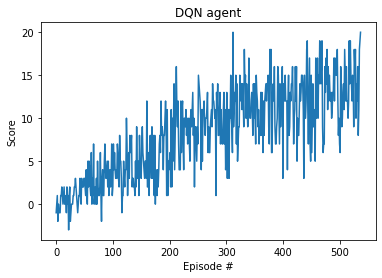

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.title('DQN agent')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

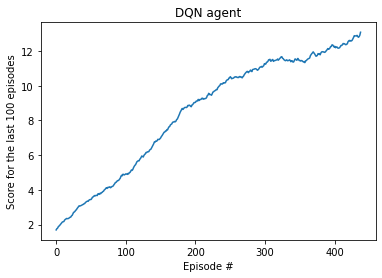

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_mean)), scores_mean)
plt.title('DQN agent')
plt.ylabel('Score for the last 100 episodes')
plt.xlabel('Episode #')
plt.show()

### 6. Load trained agent and show in action

In [11]:
# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

this_action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]
this_state_size = len(state)


''' INI the AGENT '''
agent = Agent(state_size = this_state_size, action_size = this_action_size, seed=0)
''' LOAD Trained Weights '''
agent.qnetwork_local.load_state_dict(torch.load('checkpoint_2020-12-20_13-14-29_Solved.pth'))

M_EPISODES = 5
KEEP_Action_EVERY_N_STATES = 1

action_count = 0

for e in range(M_EPISODES):
    
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    
    while True:
        
        next_action = agent.act(state,eps = 0)         # select an action
        
        update_actio = action_count % KEEP_Action_EVERY_N_STATES # keep action for n frames
        if  update_actio==0:     
            action = next_action
        
        action_count += 1
        env_info = env.step(int(action))[brain_name]        # send the action to the environment
        
        next_state = env_info.vector_observations[0]   # get the next state
        done = env_info.local_done[0]                  # see if episode has finished
        
        state = next_state                             # roll over the state to next time step
        

    
        if done:                                       # exit loop if episode finished
            break
        


In [12]:
# Close environment
env.close()

![SegmentLocal](plots/Navigation_DQN.gif "segment")